# Introduction

LSTM (Long Short Term Memory) is gaining a lot of recognition in recent past. LSTM are an interesting type of deep learning network, they are used in some fairly complex problem domain such as language translation, automatic image captioning and text generation.
LSTM are designed specifically for sequence prediction problem. This post starts of with an introduction to LSTM, there importance , the mechanics , lstm architectures and close with getting most out of LSTM models.

MLP and neural net are generally better suited to handle time series forecasting  or sequence prediction as they are robust to noise, non linear by nature, They can have multivariate inputs and outputs. Application of MLP for sequence prediction requires an input sequence be divided into smaller overlapping sub sequences to generate a prediction. The time steps of the input sequence becomes an input feature . The subsequences are overlapping to simulate a window slid among the sequence in order to generate the output.

This can work well but there are limitations

1.Stateless- MLP learn a fixed function approximation. Any inputs that are conditional on the context of the input sequence must be generalized and frozen into the network weights.

2.Unaware of Temporal Structure- Time steps are modeled as input features meaning the network has no explicit handling or understanding of temporal structure  or order between observations.
   
3.Messy Scaling - For problems that require  modeling multiple parallel input sequences, the number of input features increased by a factor of the size of the sliding window without any explicit seperation of time steps of series.

4.Fixed sized inputs - Size of the sliding window is fixed and must be imposed on all networks

5.Fixed sized outputs- Size of output is fixed and any outputs which dont conform must be forced.
_________________


RNN to the rescue 
LSTM network is type of RNN are special type of neural network specifically designed for sequence problems.
Given the standard feed forward network RNN can be thought of as addition loops to the architecture. 

For example in a given layer each neuron may pass its signal sideways in addition to forward to the next layer. The output of the network may feedback as an input to the network with next input vector and so on. 

   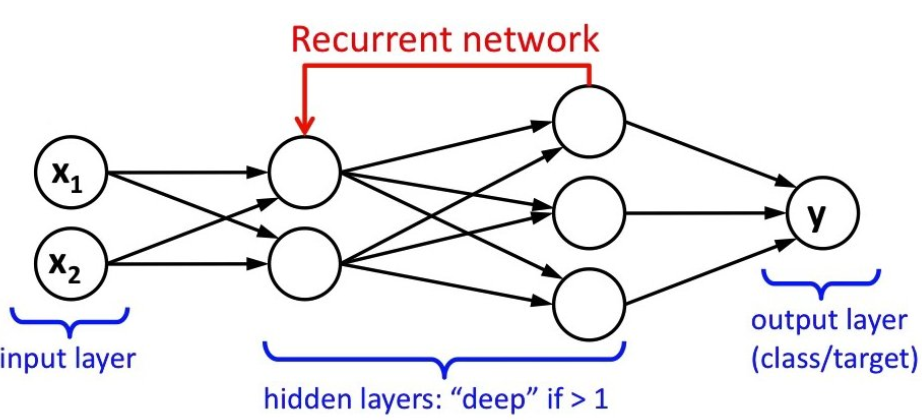
   
    
   The recurrent connection adds state or memory to the network and allow it learn and harness the ordered nature of observations of the input sequences. 
   
   RNN contains cycles of that feed the network activations from  a previous time step of inputs to the network to influence predictions at the current time step. These activation are stored in the internal states of the network which can in principle hold long term temporal contextual information. This mechanism allows RNN to exploit a dynamically changing contextual window over input sequence history.
   
   The addition of a sequence is a new dimension to the funcition been approximated. Instead of mapping inputs to outputs alone, network is capable of learning a mapping function for inputs over time to an output. The internal memory can mean outputs are conditional on the recent context in the input sequence , not just what has been processed as input to the network. In a sense this capability unlocks time series for neural network.
   
   LSTM is able to solve many time series unsolvable by feedforward NN using fixed size time windows. RNN can learn and harness the temporal dependence from the data. 
   
   LSTM have an internal state they are explicity aware of the temporal structure in the inputs, are able to model multiple parallel input series seperately and can step through varied length into sequences to produce variable length output sequences, one observation at a time.
   
   Like RNN, LSTM have recurrent connections so that the state of previous activations of the neuron from the previous time step  is used in context formation of output. But unlike RNN , LSTM have a different formulation that allows it to avoid the problems that prevent the training and scaling of other RNNs. 
   
   Key technical historical challenge in RNN is how to train them effectively. Experiments show how this was where the weight update procedure resulted in weight changes that quickly became so small as have no effect (vanishing gradients) or so large as to result in very large changes or even overflow (exploding gradients). 
   
   LSTM overcomes this by design
  RNN is limited in terms of accessing the range of contextual information. The problem is that the influences of a given input on the hidden layer and therefore the network output, either decays or blows up, as it cycles around network recurrent. 
 
For the complete working of LSTM refer this link http://colah.github.io/posts/2015-08-Understanding-LSTMs/





Application of LSTM's

Automatic Image Caption Generation
    A sequence classification problem. Automatic Image Captioning is the task given an image the system should generate a caption describing the image. Use CNN to detect the objects in the image then use LSTM to turn the labels into coherent sentences.

Automatic translation of text
Given a text in one language translate into another language. Model must learns translation of words the context where the translation is modified and support input and output sequences that may vary in both length both generally with regards to each other. 
This is a classic sequence to sequence problem

Automatic Handwriting Generation
A sequence generation problem , The task is given a corpus of handwritten examples, new handwriting for a given word or phrase is generated. 


Starting out with Vanilla LSTM code defined as 
1. Input Layer
2. Fully connected LSTM hidden layer
3. Fully connected hidden layer
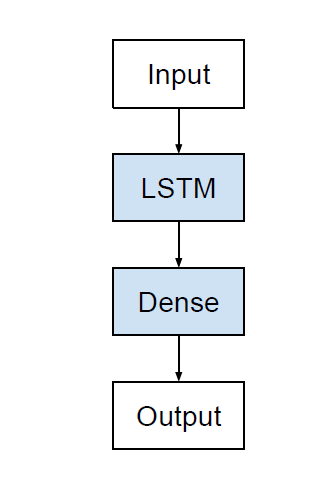
Properties of  Vanilla LSTM
1. Sequence classification conditional on multiple distributed input time steps
2. Memory of precise input observations over thousands of time steps
3. Sequence prediction as a function of prior time steps 
4. Robust to the insertion of random time steps on the input sequences
4. Robust to the placement of signal data on input sequence

# Basic LSTM (Vanilla)

In [6]:
import keras
from random import randint
from numpy import array
from numpy import argmax

In [7]:
def generate_sequence(length, n_features):
    return[ r.randint(0, n_features-1) for _ in range(length)]

In [8]:
generate_sequence(10,100) # Example to see the execution

[83, 74, 58, 33, 15, 97, 2, 72, 56, 90]

In [10]:
# generate a sequence of random numbers in [0, n_features)
def generate_sequence(length, n_features):
    return [randint(0, n_features-1) for _ in range(length)]
# one hot encode sequence
def one_hot_encode(sequence, n_features):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_features)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]
# generate random sequence
sequence = generate_sequence(25, 100)
print(sequence)
# one hot encode
encoded = one_hot_encode(sequence, 100)
print(encoded)
# one hot decode
decoded = one_hot_decode(encoded)
print(decoded)

[16, 2, 75, 62, 27, 99, 96, 88, 98, 36, 72, 31, 72, 42, 33, 37, 19, 83, 78, 75, 17, 91, 70, 61, 16]
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[16, 2, 75, 62, 27, 99, 96, 88, 98, 36, 72, 31, 72, 42, 33, 37, 19, 83, 78, 75, 17, 91, 70, 61, 16]


In [11]:
#Reshape the one hot encoded sequence into a format that can be used by the LSTM. This involves reshaping the encoded sequence 
# to have n time steps and k features , where n is number of integers in the generated sequence and k is a set of possible integers 
# at each time step
X = encoded.reshape(1,25,100)
# The output for the sequence is encoded integer at specific predefined location. This location remains consistent for all examples 
# generated for one model so that the model can learn. For example we can use the 2nd time step as the output of a sequence with 25
# time step by taking encoded value directly from the encoded sequence.
y = encoded[1, :]


In [12]:
def generate_example(length, n_features, out_index):
    #generate sequence
    sequence = generate_sequence(length,n_features)
    # one hot encode
    encoded = one_hot_encode(sequence, n_features)
    # reshape
    X = encoded.reshape(1,length, n_features)
    # select output
    y= encoded[out_index].reshape(1,n_features)
    return X,y

In [13]:
# Define and Compile the Model
# Lets start to reduce the length of the sequence to 5 integers as 100 can be too much. We will eventually get to a 100
# Lets use a single hidden layer LSTM with 25 memory units , chosen with a little trail and error .
# Output layer is connected to a Dense Layer with 10 neuron for 10 possible integers as an output 
# Softmax activation function is used on the output layer to allow the network to learn and out the distribution over possble output values
# Log loss is used while training , suitable for multiclass classification problem and efficient Adam optimization algorithm
# Accuracy metric reported each training epoch to give an idea of the skill of the model in addition to the loss
length= 5
n_features = 10
sequence = generate_sequence(length, n_features)
encoded = one_hot_encode(sequence, n_features)

In [14]:
encoded

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [15]:
# Lets start to build the model
# What we have decided is to reduce the length to 5 and range of features is from 0-10. The sequence generated is of length 5 and 
# and has numbers between 0-10 , The encoded sequence converts that to binary hot encoding i.e  10 array representation of a number 
# between 1-10 
# so the input is 5 and output is 10 which represent the probabilities of output between 0-10
# The hidden layer is an lstm of 25 memory cell (why 25 ) 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
out_index = 2
model= Sequential()
model.add(LSTM(25,input_shape=(length, n_features)))
model.add(Dense(n_features,activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25)                3600      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 3,860
Trainable params: 3,860
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
#Fit the Model

for i in range(10000):
    X,y = generate_example(length, n_features,out_index)
    model.fit(X,y,epochs=1, verbose=2)

Epoch 1/1
 - 1s - loss: 2.2575 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2846 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2573 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2199 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2379 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4641 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2819 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3469 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3396 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2920 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3444 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2504 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3027 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3568 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3503 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2398 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1896 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2510 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1990 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2540 - acc: 0.

Epoch 1/1
 - 0s - loss: 2.4256 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2948 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2785 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2441 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3785 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2018 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1756 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4113 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2501 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2615 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4051 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3751 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1924 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3576 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3889 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2720 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4145 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1249 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2157 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1520 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.15

Epoch 1/1
 - 0s - loss: 2.2245 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1622 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1781 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1918 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0946 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1801 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1986 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3162 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3522 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2293 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2496 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2154 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1389 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1382 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3869 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3056 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4988 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1765 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3320 - acc: 0.

Epoch 1/1
 - 0s - loss: 2.1791 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1506 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2743 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9209 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7308 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5311 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4811 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7059 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2684 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0372 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2533 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1302 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3597 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4624 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4975 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1467 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9520 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9963 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0580 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9867 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0780 - acc: 1.

Epoch 1/1
 - 0s - loss: 1.9696 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7930 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3070 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9030 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4427 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2742 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4397 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2288 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2923 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8348 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4175 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9312 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5737 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4464 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6661 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3995 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3239 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1039 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1086 - acc: 0.0000e+00

Epoch 1/1
 - 0s - loss: 2.2089 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4748 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6307 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8513 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1217 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2791 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4756 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3174 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4969 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1818 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9222 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.6916 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2623 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3105 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3812 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9663 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4839 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3946 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7792 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1587 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
 - 0s - loss: 1.7587 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3124 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3687 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1043 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5501 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8336 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3879 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7599 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1992 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0183 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8773 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6579 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0047 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6950 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1499 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2288 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2166 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8402 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0313 - acc: 1.0000
Epoch 1/1
 - 0s

Epoch 1/1
 - 0s - loss: 1.9679 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9872 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0803 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8915 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8272 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8126 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8618 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1732 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7878 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1565 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2278 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4821 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7642 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3554 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.2413 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4768 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5918 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4631 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3456 - acc: 0.0000e+00
Epoch 1/1
 - 0s

Epoch 1/1
 - 0s - loss: 2.5645 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9212 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8506 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.5836 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9955 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5954 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8144 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0759 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3623 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4983 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8025 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9741 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5772 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1529 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2634 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2943 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1739 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8859 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5152 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5577 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5872 - acc: 1.0000
Epo

Epoch 1/1
 - 0s - loss: 1.6996 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8237 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6579 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8392 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9612 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7013 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0902 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1057 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7944 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3510 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0930 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0982 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6644 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0211 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.7316 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2880 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4726 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2222 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7066 - acc: 0.0000

Epoch 1/1
 - 0s - loss: 1.1293 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4091 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4854 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5755 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2623 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8350 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8479 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3231 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0054 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2674 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7825 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3629 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.7375 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6603 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7351 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8576 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7962 - acc: 0.0000e+00
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 1.7306 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1143 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2257 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3952 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1614 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5165 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1605 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3329 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0955 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4410 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1025 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1423 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8150 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6457 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.8607 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.3331 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.4394 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1852 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8114 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3912 - acc: 0.

Epoch 1/1
 - 0s - loss: 1.4608 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3251 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0458 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7730 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3562 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1691 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.9313 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1966 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5677 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2300 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1411 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.4362 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2526 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5160 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2574 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1393 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8508 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1337 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0076 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2710 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6853 - acc: 1.0000
Epoch 1/1
 

Epoch 1/1
 - 0s - loss: 1.7334 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2564 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7515 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8261 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6355 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1991 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2910 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7827 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0122 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3715 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4713 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.6100 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1380 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0254 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.1480 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8861 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7250 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2957 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 4.5378 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1981 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9011 - acc: 1.0000
Epo

Epoch 1/1
 - 0s - loss: 2.3145 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7194 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3530 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5035 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0327 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6681 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1277 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2971 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5606 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4353 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7868 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6071 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.9470 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9294 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4049 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0989 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7636 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5095 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2642 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5546 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
 - 0s - loss: 3.8859 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2183 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.1386 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2220 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4354 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3746 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1267 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2179 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9414 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4405 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7473 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2203 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.5012 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3219 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0648 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.5499 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3627 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9196 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4780 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
 - 0s - loss: 0.5362 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5471 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7317 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3145 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0353 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7632 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3237 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6875 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6744 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4217 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5761 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1755 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6010 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8973 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9311 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7749 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2874 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9714 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3794 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7439 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4104 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3

Epoch 1/1
 - 0s - loss: 2.1019 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1054 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6074 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5296 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3799 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5355 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1878 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2497 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1862 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6415 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2738 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1698 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6419 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5644 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4715 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1167 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1548 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.6684 

Epoch 1/1
 - 0s - loss: 0.4969 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2345 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5237 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9698 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1040 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4265 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0681 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4838 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2837 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4598 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.7912 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1206 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2816 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2820 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2259 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1425 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7913 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7292 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7626 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6

Epoch 1/1
 - 0s - loss: 1.4879 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5634 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2658 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.0714 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5990 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0581 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5935 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1026 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4809 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7247 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5413 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3962 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5161 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.4466 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.4939 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.1484 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1324 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.3065 - acc: 0.0000e+00
Epoch 1/1
 - 0s

Epoch 1/1
 - 0s - loss: 0.1083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8296 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0451 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.0971 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0569 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4911 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2735 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1491 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3267 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1458 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9137 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5000 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7757 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0973 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6480 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1673 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0780 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5158 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5367 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1743 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.3468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2336 

Epoch 1/1
 - 0s - loss: 0.9589 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0654 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1172 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1611 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1151 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3741 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5758 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7583 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1629 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4661 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2631 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7622 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6251 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1658 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1130 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7739 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.2980 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0487 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4766 - acc: 0

Epoch 1/1
 - 0s - loss: 1.9727 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3089 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4087 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5715 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4049 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5588 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6467 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2745 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2316 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3497 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8347 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1276 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4537 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0786 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2050 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0296 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8319 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4332 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0648 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6049 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0523 - ac

Epoch 1/1
 - 0s - loss: 0.9559 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.7647 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4457 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5975 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5798 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3342 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2695 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3666 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9302 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0597 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0401 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.3003 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3578 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4767 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1571 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7201 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1025 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4682 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7826 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1008 

Epoch 1/1
 - 0s - loss: 0.9767 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.0667 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0140 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9731 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3782 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0215 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5006 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2976 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3854 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0850 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4595 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1070 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3305 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5158 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3209 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.7242 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0283 

Epoch 1/1
 - 0s - loss: 0.0961 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1902 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7481 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1602 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 1.8906 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6501 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0977 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6197 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5355 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2988 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 2.2439 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7652 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5645 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1795 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1999 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2550 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4213 - acc: 1

Epoch 1/1
 - 0s - loss: 0.9585 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.1199 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8630 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8954 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4754 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4072 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2670 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0324 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0898 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5187 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2973 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0650 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5509 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5932 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7079 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0582 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9111 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5262 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.0308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3804 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3008 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.8860 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0381 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1014 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2686 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1603 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4671 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4380 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0938 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0645 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0572 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9618 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2410 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2154 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8611 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6789 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0233 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1190 - acc: 1

Epoch 1/1
 - 0s - loss: 0.6396 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5585 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1192 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3301 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9995 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4083 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.9454 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0592 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4055 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1930 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0354 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.9705 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0944 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8231 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1090 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6091 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3638 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1004 - acc: 0.000

Epoch 1/1
 - 0s - loss: 0.0582 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0784 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1836 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3958 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4590 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0676 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2822 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8505 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5949 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2288 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1991 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2654 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3078 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0523 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5500 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1183 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0367 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2021 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.6933 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2285 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0437 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.9068 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0822 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0838 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0282 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7034 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0462 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2206 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3760 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.6198 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0738 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6741 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3645 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1974 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.3787 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3760 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1384 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5081 - ac

Epoch 1/1
 - 0s - loss: 1.3149 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.5948 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0282 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2544 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2645 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0733 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3774 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3769 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7685 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7814 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4583 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1453 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.2292 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.3113 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0708 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2273 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0604 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0121 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.9104 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6474 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.5186 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0606 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1879 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0591 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3889 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1434 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1763 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3415 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2268 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6813 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5528 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3082 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3978 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0753 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 2.0229 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0562 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1095 - acc: 1.000

Epoch 1/1
 - 0s - loss: 0.2707 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5681 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7045 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6052 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5032 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2763 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8440 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4722 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0522 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1528 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3363 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4355 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1802 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0722 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2644 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4267 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2930 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4900 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0366 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.1929 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4545 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2468 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2721 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4642 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0298 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0276 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1686 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3512 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5190 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1914 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2780 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0209 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1971 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1293 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0868 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1857 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.4619 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2126 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.4218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0459 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5101 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3122 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0570 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5404 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4102 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1378 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3295 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0705 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2778 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1399 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5668 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1827 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0257 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1164 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0451 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3690 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0853 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1568 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.2795 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0232 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1955 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7553 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0571 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4163 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1253 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1131 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1263 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0303 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5483 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3854 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2321 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1189 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0786 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1802 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0539 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0103 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1896 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0782 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3321 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4928 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4856 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1849 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6108 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4408 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3436 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2969 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5206 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0321 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1290 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2961 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1173 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1350 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1338 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3268 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3740 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1293 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1000 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1872 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3076 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0730 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0953 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2993 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0207 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1350 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1349 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3796 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0371 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1736 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0571 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6010 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1500 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.8159 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.1359 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0516 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0223 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.3109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5066 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1645 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0856 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1320 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0398 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0222 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1831 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5998 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1127 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5463 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4961 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0317 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0252 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3213 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1499 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1638 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9779 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2669 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0873 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6520 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4701 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0723 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2469 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0043 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1941 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0870 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0066 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0661 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5085 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0649 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2218 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4134 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0597 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0376 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0135 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1258 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2429 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.2355 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3874 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2512 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0152 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0164 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1372 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1301 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0818 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0273 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1689 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5458 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0428 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0327 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0925 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5591 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1737 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0396 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0883 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1676 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5807 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0099 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.2958 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4197 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1490 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0077 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7591 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0419 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3001 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0952 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0632 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2511 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1017 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0174 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0071 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1132 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1234 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4996 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0676 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1216 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0771 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1368 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0371 - acc: 1.0000
Ep

Epoch 1/1
 - 0s - loss: 0.0505 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1953 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1426 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3591 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3383 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5189 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2260 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0054 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5827 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1527 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0450 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0874 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0197 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0682 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0651 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0942 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2906 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0391 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0548 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0252 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1521 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1079 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0067 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0769 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0620 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0978 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0408 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0677 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2932 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0924 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0169 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1020 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3512 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0754 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.2948 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1793 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1637 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1351 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6657 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0614 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0443 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1233 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2143 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1268 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1249 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0953 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4454 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2137 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0735 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2152 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0162 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1043 - acc: 0.0000e+00
Epoch 

Epoch 1/1
 - 0s - loss: 0.2721 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0389 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0120 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2683 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0937 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1476 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2782 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0710 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0771 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0278 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2274 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0565 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0178 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2548 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0484 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3457 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0282 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8582 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2086 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0269 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0407 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0316 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2327 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0559 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.2432 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3223 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0030 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1420 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1180 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0371 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1156 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1292 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5903 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0789 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1143 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9971 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0714 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9485 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.3239 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0417 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0506 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1042 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0208 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0946 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0844 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1623 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0142 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1043 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2575 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1888 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3329 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2001 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0408 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1417 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0367 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0478 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1188 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1833 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1086 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0343 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0689 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0564 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2733 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1458 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1306 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0193 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0662 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0299 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0449 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0370 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2459 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0878 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0139 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0548 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0893 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4037 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0684 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0582 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0099 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0277 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0033 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0355 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1004 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1264 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0752 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2227 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5563 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0368 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1491 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0152 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0361 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2620 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4098 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0392 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1244 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0276 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0463 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1743 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1187 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0341 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0829 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0149 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2683 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3275 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0216 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0718 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1292 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0198 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0697 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0737 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0696 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1511 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0764 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0562 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0638 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0354 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0769 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1832 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3682 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0669 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1434 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0908 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0317 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5993 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2203 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0984 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.1146 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1834 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4214 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0985 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0494 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0122 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0819 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9644 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1229 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0262 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0705 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1765 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0849 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2097 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0566 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0511 - acc: 1.0000
Epoch 

Epoch 1/1
 - 0s - loss: 0.0955 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1107 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2158 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2608 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6649 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1424 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0756 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0162 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0185 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0923 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0324 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0053 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1623 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0251 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0414 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2950 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0561 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0525 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0394 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0273 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0864 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0102 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0558 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0313 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1216 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0348 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0291 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0415 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0987 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0367 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0048 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0385 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0394 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0347 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 1/1


Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0114 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3942 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0997 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0723 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0205 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0964 - acc: 1.0000


In [17]:
correct = 0
for i in range(100):
    X,y = generate_example(length, n_features, out_index)
    yhat = model.predict(X)
    if one_hot_decode(yhat) == one_hot_decode(y):
        correct+=1



In [18]:
X,y = generate_example(length,n_features,out_index)
yhat = model.predict(X)
print( 'Sequence: %s' % [one_hot_decode(x) for x in X])
print('Expected %s' % one_hot_decode(y))
print('Expected %s' % one_hot_decode(yhat))

Sequence: [[8, 5, 4, 4, 5]]
Expected [4]
Expected [4]


Above is a simple example of Vanilla LSTM,  A point to note the value of y is set to 
y= encoded[out_index].reshape(1,n_features). out_index is how far ahead or back is the value of y set to.

The next example deals with more complex LSTM. What is been covered so far is single LSTM, A more realistic situation will require more than 1 LSTM layer. This introduces the concept of Stacked LSTM.
Before dwelling into that lets take another example with some real data. The below example consists of a dataset of air passenger travel (#) daily , The idea here is to build an LSTM to predict the # of air passenger for the future. 
This example uses a single layer or vanilla LSTM


In [38]:
import numpy 
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [39]:
numpy.random.seed(11)

In [40]:
air_passengers = pandas.read_csv('a1.csv',usecols=[1], engine='python', skipfooter=3)
air_passengers  = air_passengers.values
air_passengers = air_passengers.astype('float32')

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_air_passengers = scaler.fit_transform(air_passengers)

In [42]:
train_size = int(len(scaled_air_passengers) * 0.67)
test_size = len(scaled_air_passengers) - train_size
train, test = scaled_air_passengers[0:train_size,:], scaled_air_passengers[train_size:len(scaled_air_passengers),:]
print (len(train), len(test))

96 48


In [43]:
scaled_air_passengers.shape

(144, 1)

In [44]:
# The data feed in LSTM gives a y value dependent on the past sequence the understand on how far back do we look into is conversatoin for
# another day, For this example we go back is taken as previous step
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [45]:
look_back= 3
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [46]:
# reshape input to be [samples, time_steps,features]
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [48]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
 - 1s - loss: 0.0243
Epoch 2/100
 - 0s - loss: 0.0111
Epoch 3/100
 - 0s - loss: 0.0098
Epoch 4/100
 - 0s - loss: 0.0082
Epoch 5/100
 - 0s - loss: 0.0071
Epoch 6/100
 - 0s - loss: 0.0064
Epoch 7/100
 - 0s - loss: 0.0052
Epoch 8/100
 - 0s - loss: 0.0050
Epoch 9/100
 - 0s - loss: 0.0046
Epoch 10/100
 - 0s - loss: 0.0044
Epoch 11/100
 - 0s - loss: 0.0042
Epoch 12/100
 - 0s - loss: 0.0043
Epoch 13/100
 - 0s - loss: 0.0041
Epoch 14/100
 - 0s - loss: 0.0041
Epoch 15/100
 - 0s - loss: 0.0041
Epoch 16/100
 - 0s - loss: 0.0040
Epoch 17/100
 - 0s - loss: 0.0039
Epoch 18/100
 - 0s - loss: 0.0040
Epoch 19/100
 - 0s - loss: 0.0041
Epoch 20/100
 - 0s - loss: 0.0040
Epoch 21/100
 - 0s - loss: 0.0042
Epoch 22/100
 - 0s - loss: 0.0041
Epoch 23/100
 - 0s - loss: 0.0040
Epoch 24/100
 - 0s - loss: 0.0040
Epoch 25/100
 - 0s - loss: 0.0041
Epoch 26/100
 - 0s - loss: 0.0041
Epoch 27/100
 - 0s - loss: 0.0039
Epoch 28/100
 - 0s - loss: 0.0040
Epoch 29/100
 - 0s - loss: 0.0038
Epoch 30/100
 - 0s - lo

In [28]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testY = scaler.inverse_transform([testY])
testPredict = scaler.inverse_transform(testPredict)

In [49]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [50]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27.67 RMSE
Test Score: 55.39 RMSE


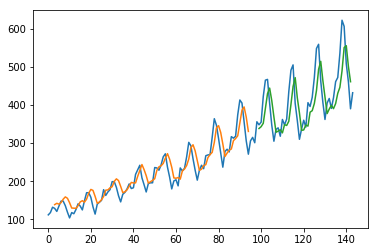

In [51]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTM

So far we have seen vanilla LSTM we have set the value of y to a look back in x chain by x days. The LSTM layer used so far 4 memory units. Its time to graduate on to multi layer LSTM , lets focus on developing a Stacked LSTM.
Solving the damped Sine wave problem. 
Damped Sinewave is a sinusiodal function whose amplititude approaches zero as time increases. 
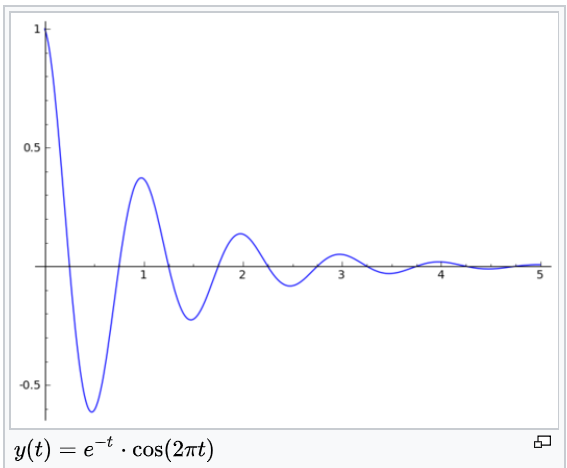

First establishing the understanding as why do we need stacked LSTM.
Stacking LSTM to form a deeper network. DNN essentially are massive pipeline where each layer solves some part of the problem and passes it to next layer. Stacked LSTM are essentially multiple network in the lines of deep network. 
The nature of the damped sine wave is very evident why this is a good example of stacked LSTM.

A bit on the Architecture of LSTM
LSTM operates on sequence data , addition of new layer adds a level of abstraction of input observation over time. In effect chunking observations over time or representing the problem at different time scales.
        A Stacked LSTM architecture can be defined as LSTM model comprised of multiple LSTM layers. An LSTM layer can provide q sequence output , Specifically one output per input time step. Lets dig into the implementation.
`